In [1]:
import sklearn
print(sklearn.__version__)

1.7.2


In [2]:
!pip install scikit-learn


In [3]:
import sklearn
print(sklearn.__file__)


C:\Users\Abdul Razak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\__init__.py


In [4]:
import sys
print(sys.executable)


C:\Users\Abdul Razak\AppData\Local\Programs\Python\Python313\python.exe


In [5]:
# Import all the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data_df = pd.read_csv("bank.csv")

In [6]:
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [7]:
data_df.shape

(515, 6)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [9]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bank,515.0,258.000000,148.811962,1.0,129.5,258.0,386.5,515.0
DD,515.0,232.252427,66.648815,120.0,169.5,237.0,291.0,350.0
Withdrawals,515.0,150.693204,56.897777,10.0,103.0,152.0,200.0,247.0
Deposits,515.0,81.687379,28.596912,33.0,58.0,80.0,105.0,212.0
Branch Area in sqft,515.0,2934.669903,437.062831,1200.0,2675.0,2960.0,3300.0,3650.0
avg daily walkins,515.0,598.603883,83.487891,380.0,537.5,601.0,657.5,838.0


In [10]:
data_df.duplicated().sum()

np.int64(0)

In [11]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [12]:
# Creating an object for the StandardScaler function?.
X = StandardScaler() 
# zscore=(x-Mu)/Sigma-> move the data to center zero
# mean=0 , std_dev=1

In [13]:
scaled_df=X.fit_transform(data_df)

In [14]:
scaled_df

array([[-1.72869086, -0.07888413, -0.06497257,  1.02602411, -1.08710095,
         0.48432644],
       [-1.72196444, -1.64081915, -1.13811308, -0.58410514,  1.31763546,
        -1.949528  ],
       [-1.71523801,  1.10758573, -0.02978763, -0.19907423, -0.83517619,
         0.84400936],
       ...,
       [ 1.71523801,  1.51308809, -1.13811308,  0.92101568, -0.19391314,
         0.92793538],
       [ 1.72196444, -0.60453534,  0.44520899, -1.66919225, -0.40003341,
        -1.12225728],
       [ 1.72869086,  1.48305088,  0.62113366,  0.53598477, -0.53744692,
         2.01897357]], shape=(515, 6))

In [15]:
data_df.columns

Index(['Bank', 'DD', 'Withdrawals', 'Deposits', 'Branch Area in sqft',
       'avg daily walkins'],
      dtype='object')

In [16]:
data_df.iloc[:,1:6] # take all rows, col- from 1 to 5

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,227,147,111,2460,639
1,123,86,65,3510,436
2,306,149,76,2570,669
3,251,112,129,3650,623
4,174,135,128,3400,579
...,...,...,...,...,...
510,337,140,111,2640,694
511,168,131,60,2640,524
512,333,86,108,2850,676
513,192,176,34,2760,505


In [17]:
scaled_df = pd.DataFrame(X.fit_transform(data_df.iloc[:,1:6]),
                         columns=data_df.columns[1:])

In [18]:
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


In [19]:
import pandas as pd
data=pd.DataFrame({'A':[1,2,3,4],'B':[5,6,7,8],'C':[9,10,11,12]},
                  index=['row1','row2','row3','row4'])
print(data)

      A  B   C
row1  1  5   9
row2  2  6  10
row3  3  7  11
row4  4  8  12


In [20]:
data.loc['row1','B'] #loc=location -> lable based indexing
print(data.iloc[1:3,1:3])

      B   C
row2  6  10
row3  7  11


In [21]:
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


CREATE CLUSTERING USING K-MEANS

FORMING 2 CLUSTERING WITH K=2

In [22]:
from sklearn.cluster import KMeans
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1) # forming 2 clusters

In [23]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [24]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [25]:
# WSS - WITH IN SUM OF SQUARE
k_means.inertia_ # spread of data point or variance of the cluster

1943.510336183869

INERIA WILL LESSER THEN FORM GROUPING INERTIA WILL HIGH NOT FORM GROUPING

In [26]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

2575.0

In [27]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1643.67578025067

In [28]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1380.5339592963164

In [29]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1380.5339592963164

In [30]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1131.7361926287206

In [31]:
print("Kmeans clustering inertia value for different k clusters:")
for k in range(1,7):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_df)
    print(f"n_clusters={k}, inertia={kmeans.inertia_:.2f}")

Kmeans clustering inertia value for different k clusters:
n_clusters=1, inertia=2575.00
n_clusters=2, inertia=1945.73
n_clusters=3, inertia=1593.91
n_clusters=4, inertia=1379.36
n_clusters=5, inertia=1220.45
n_clusters=6, inertia=1174.26


In [32]:
wss =[] # WITHIN SUM OF SQUARE

In [33]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [34]:
wss

[2575.0,
 1943.510336183869,
 1643.67578025067,
 1380.5339592963164,
 1234.6565403971904,
 1131.7361926287206,
 1047.8112475358532,
 955.7131001088329,
 888.0481212540406,
 836.0098842123267]

In [35]:
k=[1,2,3,4,5,6,7,8,9,10]

<Axes: >

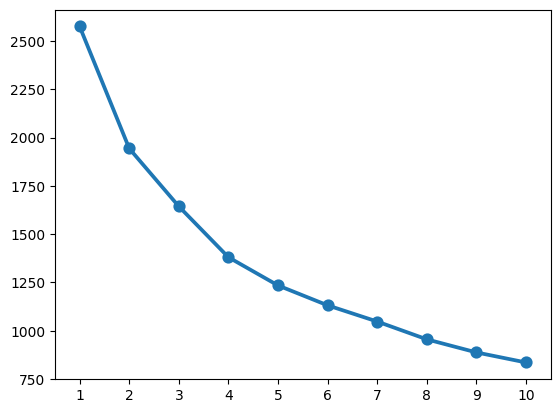

In [36]:
import seaborn as sns
sns.pointplot(x=k, y=wss)

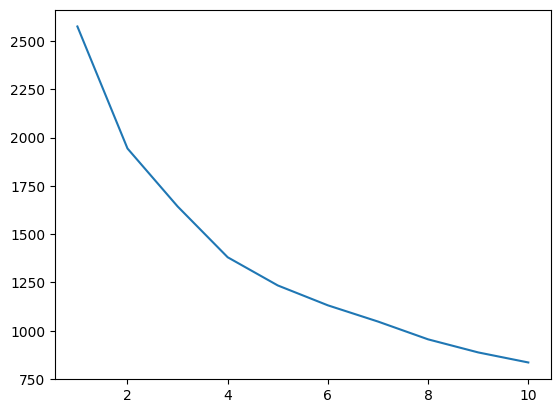

In [37]:
plt.plot(range(1,11), wss)

In [38]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels_cluster3 = k_means.labels_

In [39]:
labels_cluster3

array([1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1,
       1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1,

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
# Calculating silhouette_score for k=3
silhouette_score(scaled_df,labels_cluster3,random_state=1)

0.20499738296547812

In [42]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels_cluster4 = k_means.labels_

#from sklearn.metrics import silhouette_samples, silhouette_score

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(scaled_df,labels_cluster4,random_state=1)

0.22260108147197633

In [44]:
data_df["Clus_kmeans4"] = labels_cluster4
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans4
0,1,227,147,111,2460,639,1
1,2,123,86,65,3510,436,2
2,3,306,149,76,2570,669,1
3,4,251,112,129,3650,623,0
4,5,174,135,128,3400,579,2


In [45]:
# Number of banks in each clusters
data_df.Clus_kmeans4.value_counts().sort_index()
# The bank within cluster 0 = 147 are highly similar
# Cluster 0 and clsuter 1 are highly dissimilar

Clus_kmeans4
0    147
1    124
2    104
3    140
Name: count, dtype: int64

In [46]:
# Drop the bank column from the dataset
clust_profile=data_df.drop(['Bank'],axis=1)


In [47]:
clust_profile.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans4
0,227,147,111,2460,639,1
1,123,86,65,3510,436,2
2,306,149,76,2570,669,1
3,251,112,129,3650,623,0
4,174,135,128,3400,579,2


# syntax
# data.groupby('obj_col_name').agg()
# min(),max(),sum(),count(),mean()

In [48]:
# Cluster profiling by taking average value of the parameters
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
Clus_kmeans4,,,,,
0,287.564626,101.013605,77.326531,3115.646259,597.272109
1,282.266129,191.322581,87.572581,2563.951613,695.169355
2,159.500000,106.682692,84.201923,3012.548077,487.634615
3,183.921429,199.564286,79.185714,3015.142857,596.907143


In [49]:
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans4,,,,,,
0,287.564626,101.013605,77.326531,3115.646259,597.272109,147
1,282.266129,191.322581,87.572581,2563.951613,695.169355,124
2,159.500000,106.682692,84.201923,3012.548077,487.634615,104
3,183.921429,199.564286,79.185714,3015.142857,596.907143,140


- Cluster 0: Medium size bank with less withdrawal,walkin, DD but highest Deposit
- Cluster 1: Medium size bank with less walkins and deposits and high withdrawals
- Cluster 2: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 3: Large size bank with more number of walkins and highest DD, but less Deposits

SOME RECOMMENDATIONS
1. The banks in Cluster 3 has high DD and Withdrawals, but less Deposit.  So it needs to improve in making the customers Deposit more. Relatively large number of customers are visiting these banks. So, can promote various deposit schemes to these customers.
2. Customers in Cluster 3 seems to prefer payment through DD as these banks record the highest DD rate. Banks can check if DD is being made to other banks or to the same bank, and can look to create DD schemes for their own bank, so that customers will open their account with these banks and use the DD payment scheme.
3. Customers preferring DD payment can go to banks either in Cluster 3 (if they need large space which can manage large crowd probably with more infrastructure facilities), or Cluster 2 (if they want small space where probably quick transaction can happen due to less crowd holding capacity) 
4. Size of the bank doesn't matter in accomodating large group of customers inside the bank, as Cluster 2 though having the least Branch Area, has the highest daily walk ins. So, banks don't need to invest more in occupying large land space. This could mean Customers are visiting throughout the day rather than a large group of customers visiting during a period.
5. Cluster 0 has large area and the proportion of withdrawals and deposits is almost equal. Most of these customers could be having a savings account since the withdrawals as well as DD are less when compared to other clusters. Customers visiting these banks are also lesser than other clusters. These banks can look bringing in more customers and increase the bank deposit by introducing various deposit schemes.
6. Deposit is again less, while the withdrawals are much higher for Cluster 1. These banks can also look to introducing new deposit schemes.
7. Banks in cluster 1 and 2, needs to focus on their infrastructure and banking facilities, since the area is lesser than cluster 0 and 3 , whereas daily walkins is the highest. These banks can also look for opportunities to cross-sell products to the customers.
